In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [3]:
 data=pd.read_csv('silver.csv')


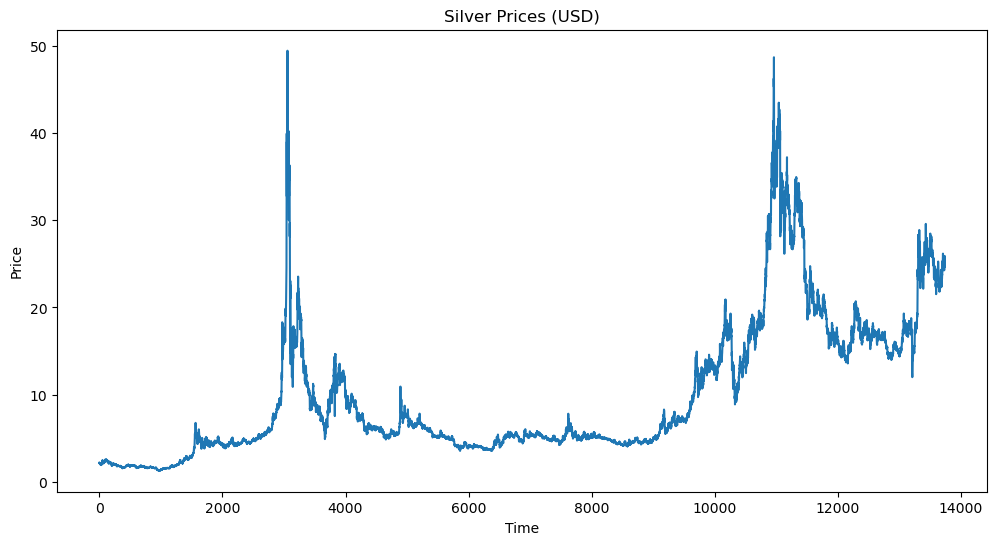

C:\ProgramData\anaconda3\Lib\site-packages\matplotlib\axes\_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


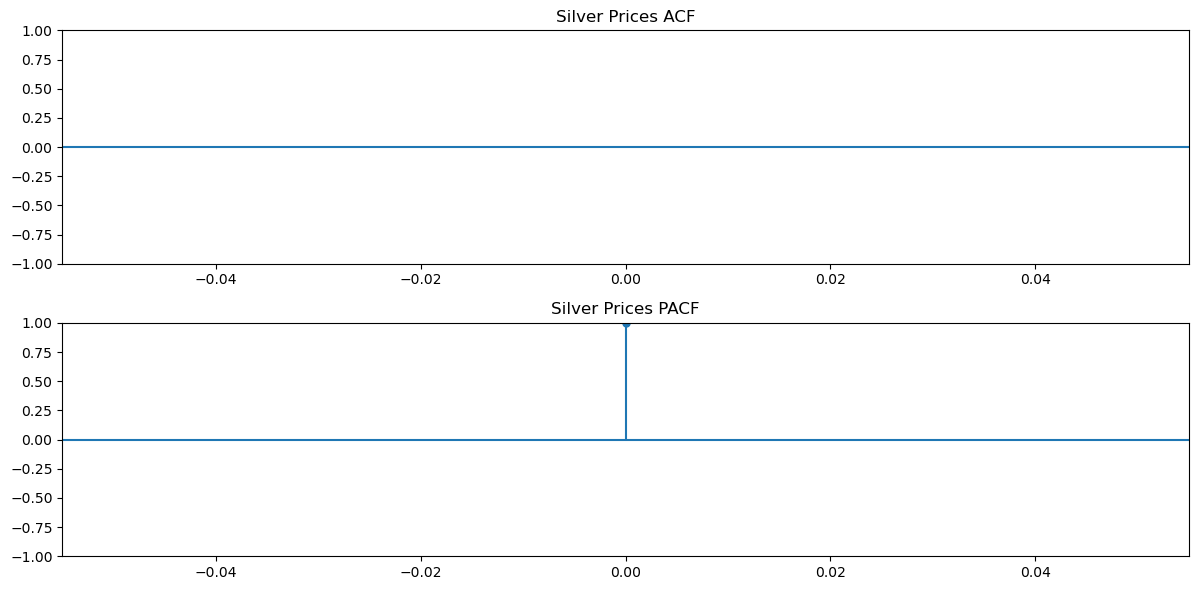

In [4]:
N = 1000
plt.rcParams['figure.figsize'] = [12, 6]
X = data['USD'][::-1].reset_index(drop=True)
plt.plot(X)
plt.title('Silver Prices (USD)')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()

plt.subplot(2, 1, 1)
plot_acf(X, lags=int(len(X)/4), ax=plt.gca())
plt.title('Silver Prices ACF')

plt.subplot(2, 1, 2)
plot_pacf(X, lags=int(len(X)/4), ax=plt.gca())
plt.title('Silver Prices PACF')

plt.tight_layout()
plt.show()


In [5]:
arma11_model = ARIMA(X, order=(1, 0, 1)).fit()
phi1_arma11 = arma11_model.params['ar.L1']
theta1_arma11 = arma11_model.params['ma.L1']


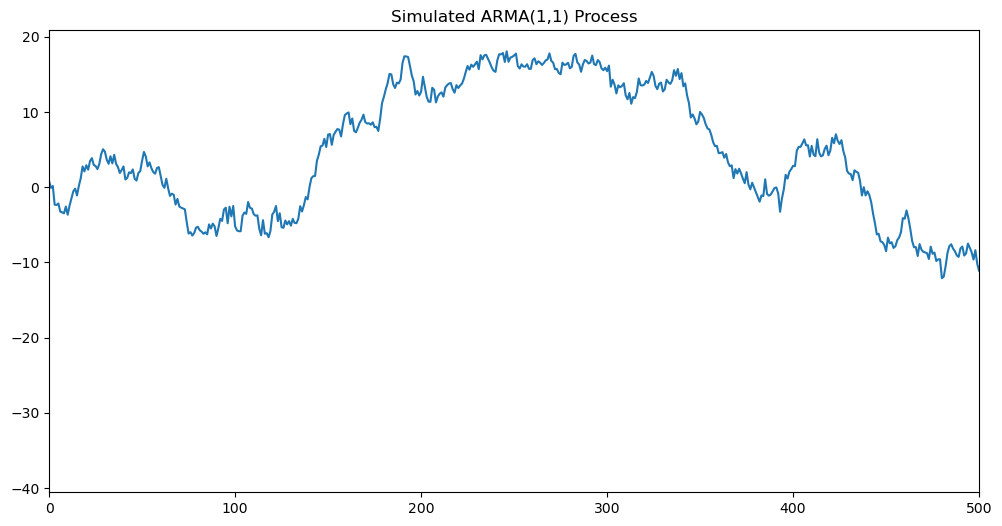

In [6]:
ar1 = np.array([1, -phi1_arma11])
ma1 = np.array([1, theta1_arma11])
ARMA_1 = ArmaProcess(ar1, ma1).generate_sample(nsample=N)
plt.plot(ARMA_1)
plt.title('Simulated ARMA(1,1) Process')
plt.xlim([0, 500])
plt.show()

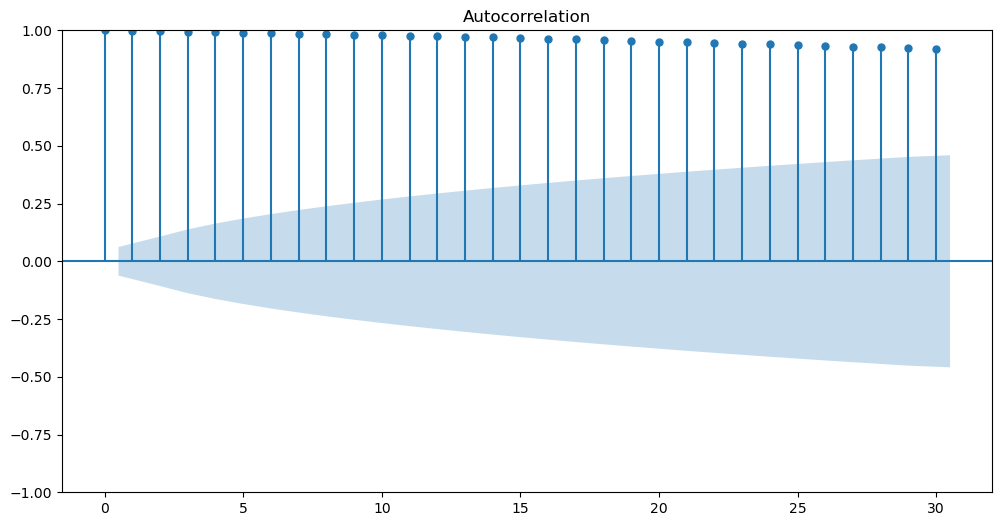

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


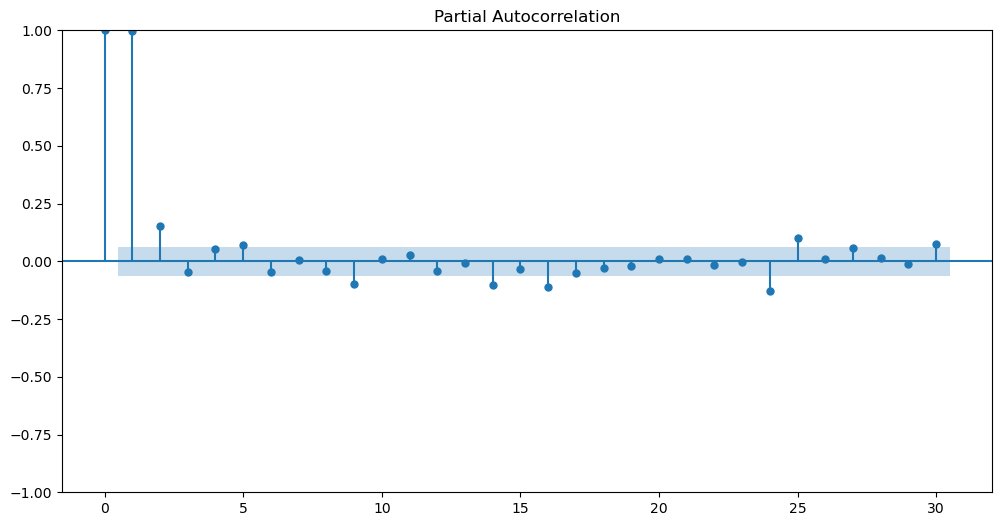

In [7]:
plot_acf(ARMA_1)
plt.show()
plot_pacf(ARMA_1)
plt.show()

In [8]:
arma22_model = ARIMA(X, order=(2, 0, 2)).fit()
phi1_arma22 = arma22_model.params['ar.L1']
phi2_arma22 = arma22_model.params['ar.L2']
theta1_arma22 = arma22_model.params['ma.L1']
theta2_arma22 = arma22_model.params['ma.L2']

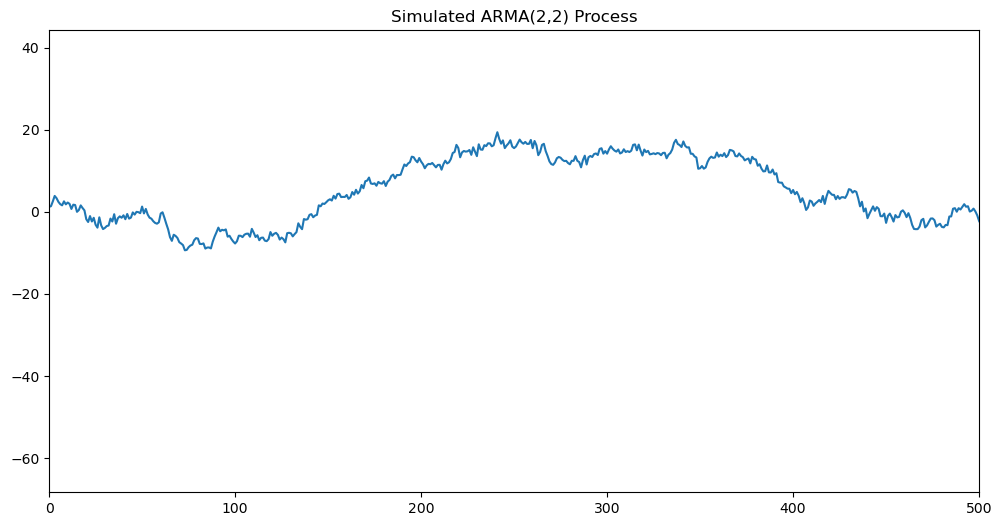

In [9]:
ar2 = np.array([1, -phi1_arma22, -phi2_arma22])  
ma2 = np.array([1, theta1_arma22, theta2_arma22])  
ARMA_2 = ArmaProcess(ar2, ma2).generate_sample(nsample=N*10)
plt.plot(ARMA_2)
plt.title('Simulated ARMA(2,2) Process')
plt.xlim([0, 500])
plt.show()

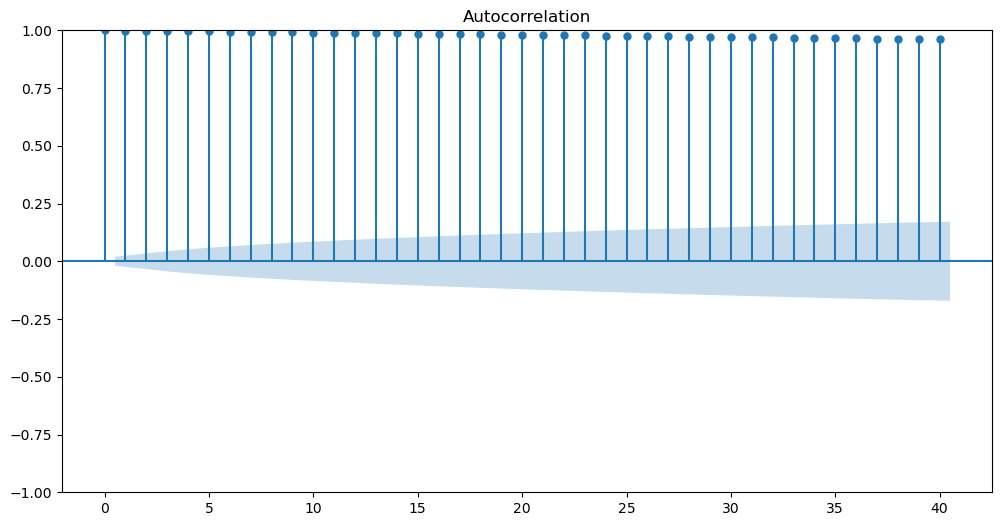

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


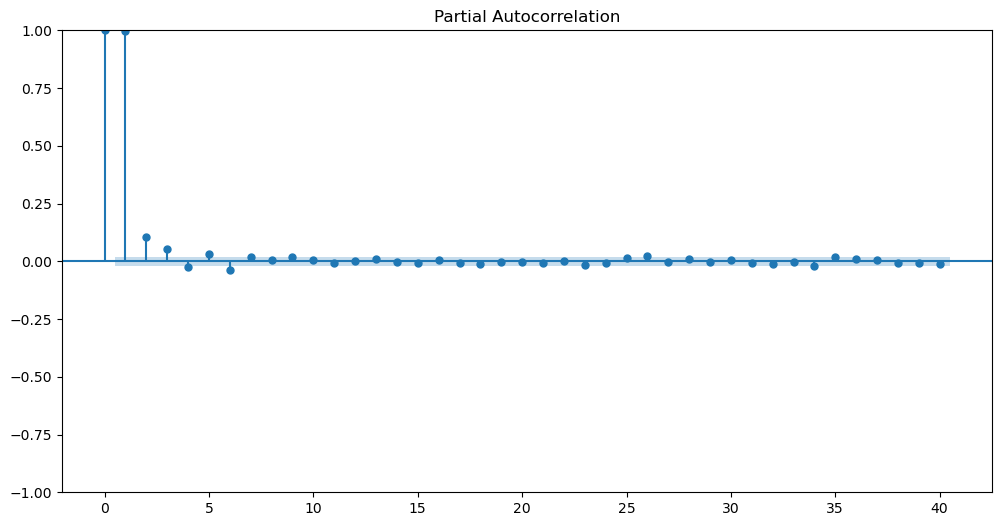

In [10]:
plot_acf(ARMA_2)
plt.show()
plot_pacf(ARMA_2)
plt.show()
